### All-sky AME vs. IR Scatter Plots

In [1]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
from pylab import arange, show, cm

cmap = cm.rainbow
cmap.set_under('w')

%matplotlib inline

# 0.1) Load data and masks:

In [2]:
with open('../Data/maps_nest.pickle') as f:  # Python 3: open(..., 'rb')
    coords, planck_bb, planck_mw,  phot, phot_modesub, phot_mpsub = pickle.load(f)
planck_bb.columns


Index([u'$T$', u'$B$', u'$I_{dust}(545)$', u'$R_{PR1}$', u'$\tau_{353,PR1}$',
       u'$U$'],
      dtype='object')

# Planck COMMANDER Parameter Maps comparison:
We consider the Planck COMMANDER maps to be a good approximation of relative foreground components, at low angular resolution. However even as PC themselves indicate, there are still critical degeneracies in the maps.
In order to illustrate these degeneracies and not mislead the reader that we are comparing "ground-truth" foreground component maps to IR data, we show various ratio maps below.

First we show simple ratio maps: that of the AME relative to each of the other major components Spatial Correlation Maps. These show the correlation score of ~15arcmin pixels 

In [210]:
import healpy as hp
AMEvar_freq = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_FREQ_MEAN.fits', nest=True)
AMEvar_rad  = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_INT_I.fits', nest=True)
AMEfix_rad  = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_fix_INT_I.fits', nest=True)
AMEcomb_rad = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_comb_INT_I.fits', nest=True)
AMEvar_rms  = hp.read_map('../Data/raw/COM_CompMap__AME-commander_0256_R2.00_var_I_RMS.fits', nest=True)
COm_beta    = hp.read_map('../Data/raw/COM_CompMap_dust-commander_0256_R2.00.fits.gz', field = , nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


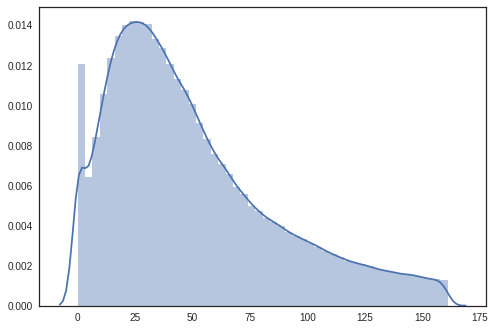

In [99]:
import seaborn as sb


from scipy.stats import sigmaclip

# (data, 
#                          sigma=3, 
#                          sigma_lower=None, 
#                          sigma_upper=None, 
#                          iters=5, 
#                          cenfunc=<function median>, 
#                          stdfunc=<function std>, 
#                          axis=None, 
#                          copy=True)
def plotClippedHist(data,sigma, log=False):
    c, upp, low = sigmaclip(data,sigma ,sigma)
    
    with sb.axes_style("white"):
        if log == True:
            sb.distplot(np.log10(c))
        else:
            sb.distplot(c)
        

plotClippedHist(planck_mw['AME'], 3)

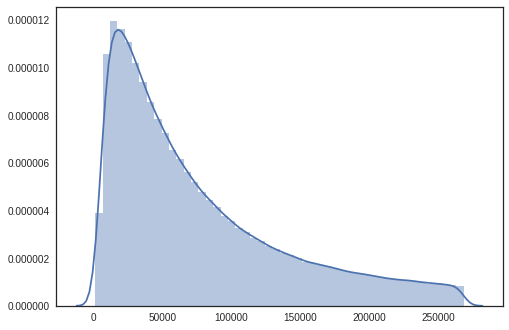

In [93]:
plotClippedHist(AMEcomb_rad, 3)

In [306]:

plotClippedHist(np.log10(AMEfix_rad), 5)

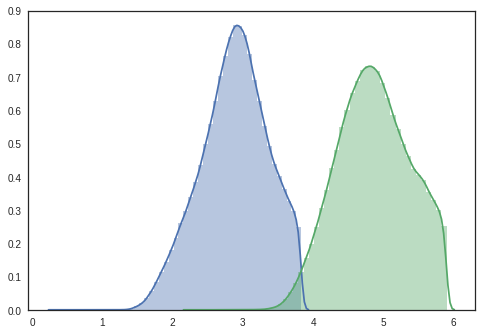

In [101]:
plotClippedHist(AMEfix_rad, 4, log=True)
plotClippedHist(AMEvar_rad, 4, log=True)

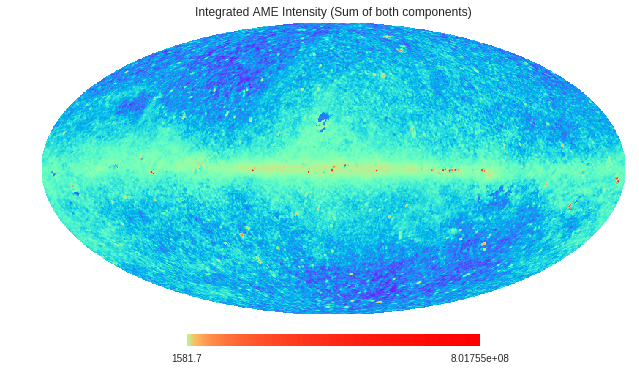

In [216]:

AMEcomb_rad

hp.mollview(AMEcomb_rad, 
            norm='log', 
            nest=True, 
            #min=1.5, max = 2.0, 
            cmap=cmap,
            title = "Integrated AME Intensity (Sum of both components)")

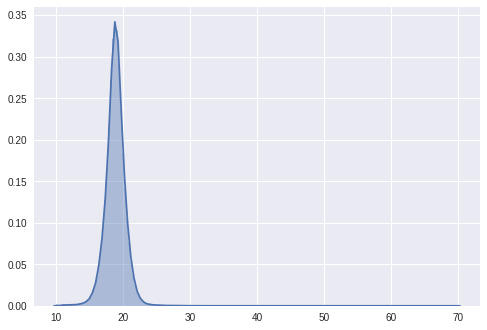

In [290]:
#bins = plt.hist(np.log(AMEvar_rad),  bins=200,density=True, alpha=0.3)
bins = sb.distplot(AMEvar_freq, 
                   bins=200)

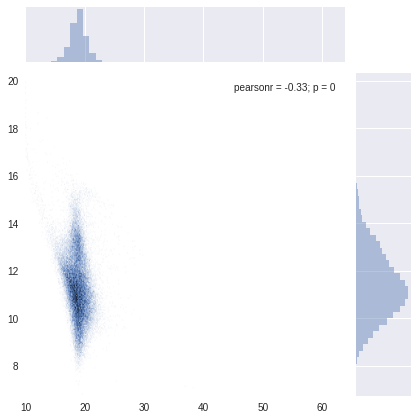

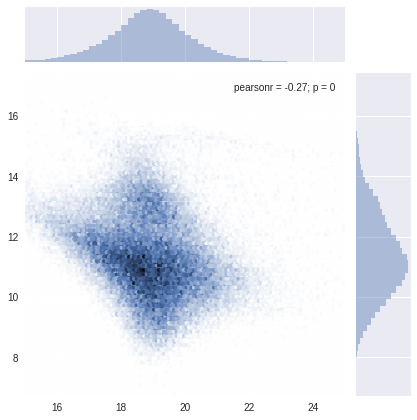

In [303]:
sb.jointplot(AMEvar_freq[::10],
             np.log(AMEvar_rad[::10]), 
             kind= 'hex')

sb.jointplot(AMEvar_freq[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)],
             np.log(AMEvar_rad[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)]), 
             kind= 'hex')

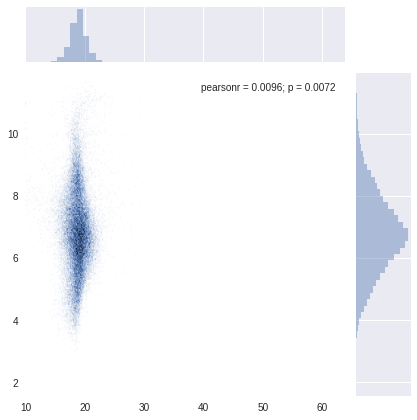

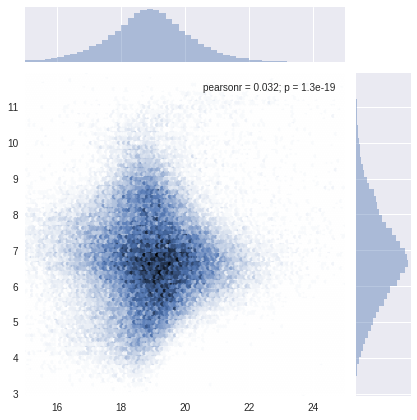

In [304]:
sb.jointplot(AMEvar_freq[::10],
             np.log(AMEfix_rad[::10]), 
             kind= 'hex')

sb.jointplot(AMEvar_freq[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)],
             np.log(AMEfix_rad[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)]), 
             kind= 'hex')

In [176]:
freq_cut = np.where(AMEvar_rad[AMEvar_freq > 15]
                    


In [ ]:
Next we 

In [212]:
ancillframe = pd.DataFrame()

    
ancillframe['$N_{H}$'] = hp.ud_grade(
    hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits',
                                  nest=True),
    nside_out = 256,
    order_in = 'NESTED',
    order_out = 'NESTED',
    pess=True)


ancillframe['$H_{a}$'] = hp.ud_grade(
                               hp.read_map(
                                   '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits',
                                           nest=True),
                               nside_out = 256, 
                               order_in = 'NESTED', 
                               order_out = 'NESTED' )

ancillframe['H408'] = hp.ud_grade(
                               hp.read_map(
                                   '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/haslam408_dsds_Remazeilles2014.fits',
                                           nest=True),
                               nside_out = 256, 
                               order_in = 'NESTED', 
                               order_out = 'NESTED' )
    
    

    
ancillframe_n64 = pd.DataFrame()

for i in ancillframe.columns:
    ancillframe_n64[i] =  hp.ud_grade(
            
            ancillframe[i].values,
            nside_out = 64,
            order_in = 'NESTED',
            order_out = 'NESTED')

ancillframe_n64['$AME_{wmap}$'] = hp.ud_grade(
                hp.read_map(
                    '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/wmap_mcmc_sd_k_spin_dust_temp_7yr_v4p1.fits',
                nest=True),
            nside_out = 64,
            order_in = 'NESTED',
            order_out = 'NESTED')


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler


### Setup the standard pipeline to apply to all the data:
allsky_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler(with_mean=False)),
])
# allsky_pipeline = Pipeline([
#     ('imputer', Imputer(strategy="median"))
# ])

phot_tr      = pd.DataFrame(allsky_pipeline.fit_transform(phot),columns=phot.columns)
planck_bb_tr = pd.DataFrame(allsky_pipeline.fit_transform(planck_bb),columns=planck_bb.columns)
planck_mw_tr = pd.DataFrame(allsky_pipeline.fit_transform(planck_mw),columns=planck_mw.columns)




### 1.1) Cross-correlation among all IR photometric bands and AME map
##### Split by Galactic Latitude

In [190]:
glatrange     = 10.0
elatrange     = 10


gcut_l = np.where(
    (abs(coords['glat']) < glatrange) & 
    (abs(coords['elat']) > elatrange)
    )

gcut_h = np.where(
    (abs(coords['glat']) > glatrange) & 
    (abs(coords['elat']) > elatrange)
)



In [191]:
def plotCorrMatrix(mapframe, pdf_suffix):
    
    mapframe_corr     = mapframe.corr(method='spearman')
    mapframe_corr_lgl = mapframe.iloc[gcut_l].corr(method='spearman')
    
    mask = np.zeros_like(mapframe_corr.values)
    mask[np.triu_indices_from(mask,k=1)] = True

    with sb.axes_style("white"):


        fig, ax = plt.subplots(1,2,figsize=(18,9))
        #cbar_ax = fig.add_axes([.91, .2, .03, .7])

        sb.heatmap(
            mapframe_corr,
            #linewidths=.5,
            annot=True,
            mask=mask,
            cbar=False,
            yticklabels=True,
            xticklabels=True,
            ax = ax[0],
            vmin=0,
            vmax=1)

        ax[0].set_title("Whole-sky", fontsize=20)

        sb.heatmap(
            mapframe_corr_lgl,
            #linewidths=.5,
            annot=True,
            mask=mask,
            cbar=False,
            #cbar_ax=cbar_ax,
            yticklabels=True,
            xticklabels=True,
            ax=ax[1],
            vmin=0,
        #    vmax=1 ,cbar_kws={'label': 'Spearman $r$'}
        )

        ax[1].set_title("$|b| < 10^{\circ}$", fontsize=20)

        #cbar_ax.set_title("Spearman $r$")
        fig.tight_layout(rect=[0, 0, .9, 1])

        plt.show()

        fig.savefig("../Plots/all_bands_corr_matrix_wAME_spearman{}.pdf".format(pdf_suffix), bbox_inches='tight')
        fig.savefig("../Plots/png/all_bands_corr_matrix_wAME_spearman{}.png".format(pdf_suffix), bbox_inches='tight')
       


Now we compare the spearman correlation scores among all of the IR bands, and the AME. We do this for for 3 different cases: 

  * Intensity
  * Intensity / U
  * Intensity / R 

In [222]:
# Unnormalized intensity correlations matrix:

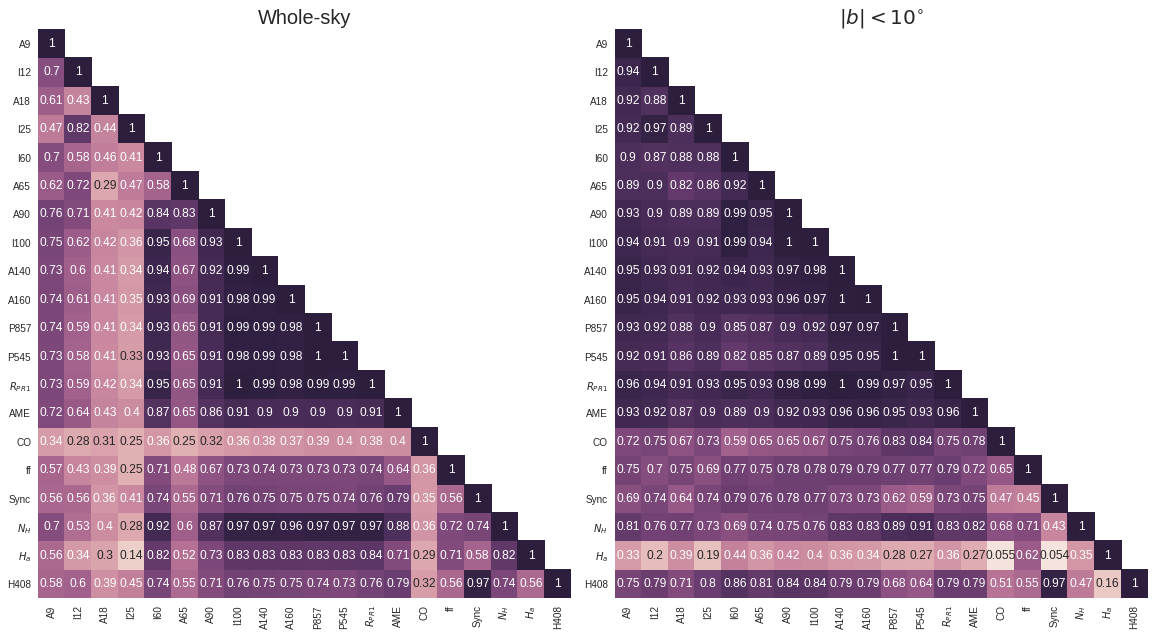

In [223]:
plotCorrMatrix(
    phot_mpsub.join(
        planck_bb['$R_{PR1}$']).join(planck_mw).join(ancillframe),
    pdf_suffix = 'intensity'
               )

### Radiation field normalized correlations matrix:

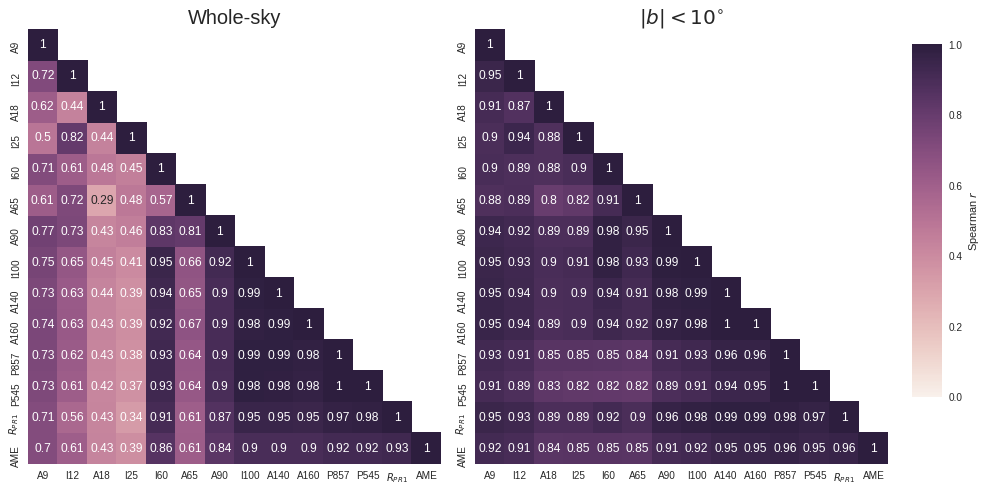

In [194]:
plotCorrMatrix(  
                (
                    phot_mpsub.join(
                    planck_bb['$R_{PR1}$']).join(
                        planck_mw['AME'])
                ).divide(
                    planck_bb['$U$'], axis=0),
                pdf_suffix = 'U_norm'
               )

### Opacity-normalized correlations matrix:

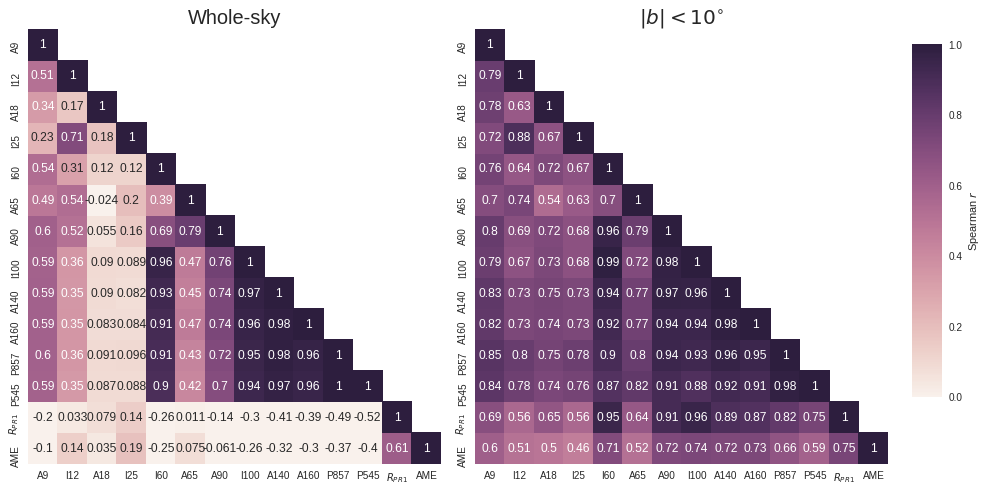

In [10]:
plotCorrMatrix(  
                (
                    phot_mpsub.join(
                    planck_bb['$R_{PR1}$']).join(
                        planck_mw['AME'])
                ).divide(
                    planck_bb['$\tau_{353,PR1}$'], axis=0),
                pdf_suffix = 'tau_norm'
               )

### Radiance noramlized correlations matrix:

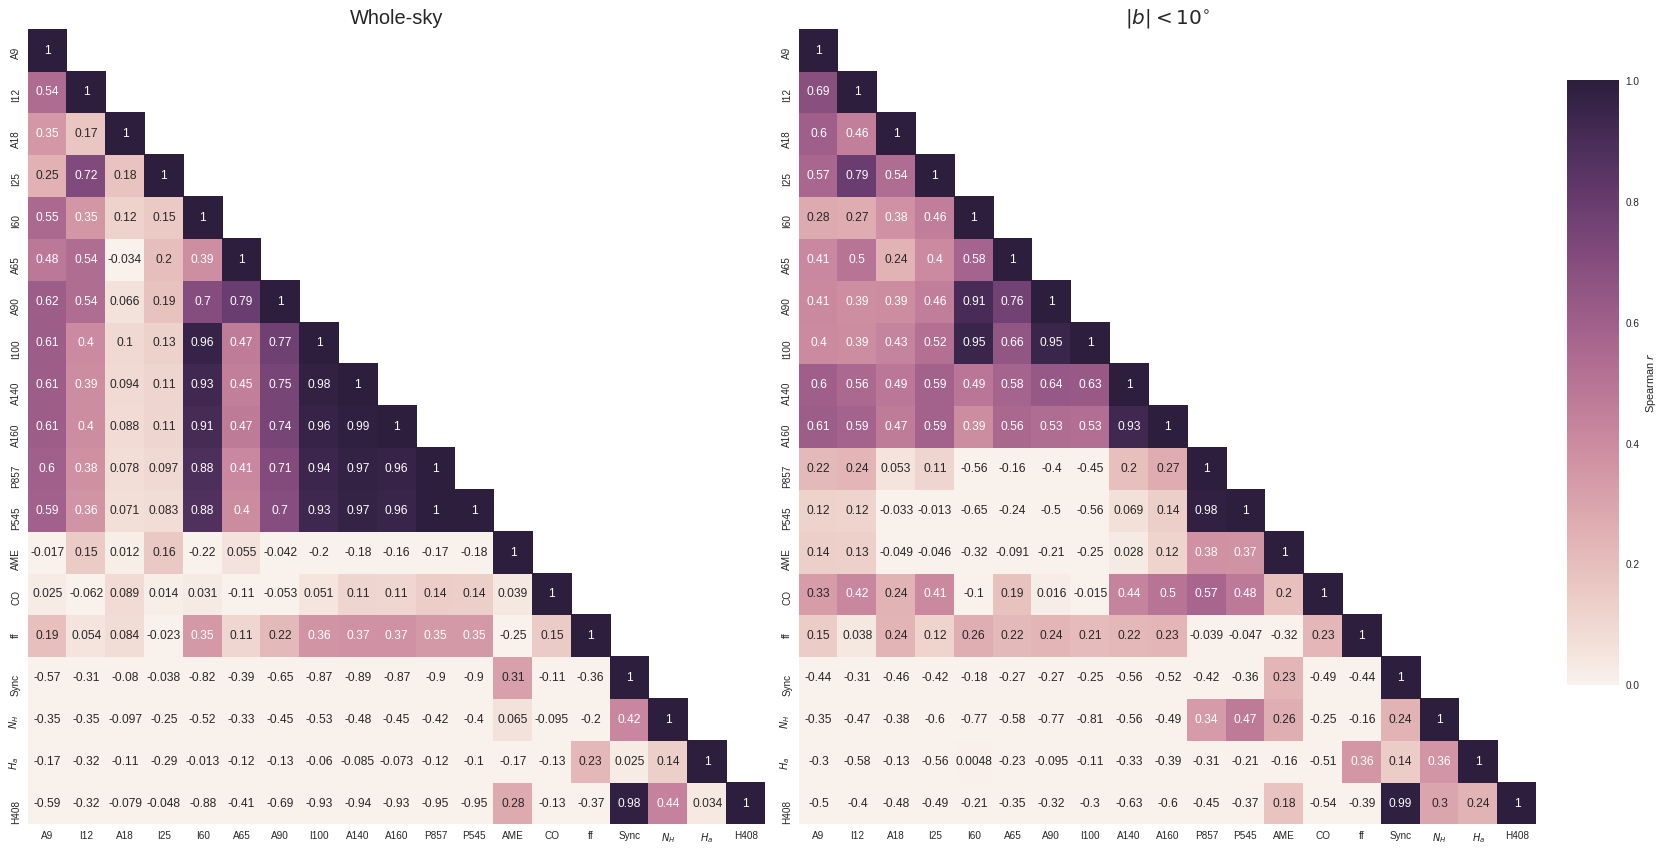

In [214]:
plotCorrMatrix(  
                ((phot_mpsub.join(planck_mw)).join(ancillframe) ).divide(
                    planck_bb['$R_{PR1}$'], 
                    axis=0),
                pdf_suffix = 'R_norm'
               )

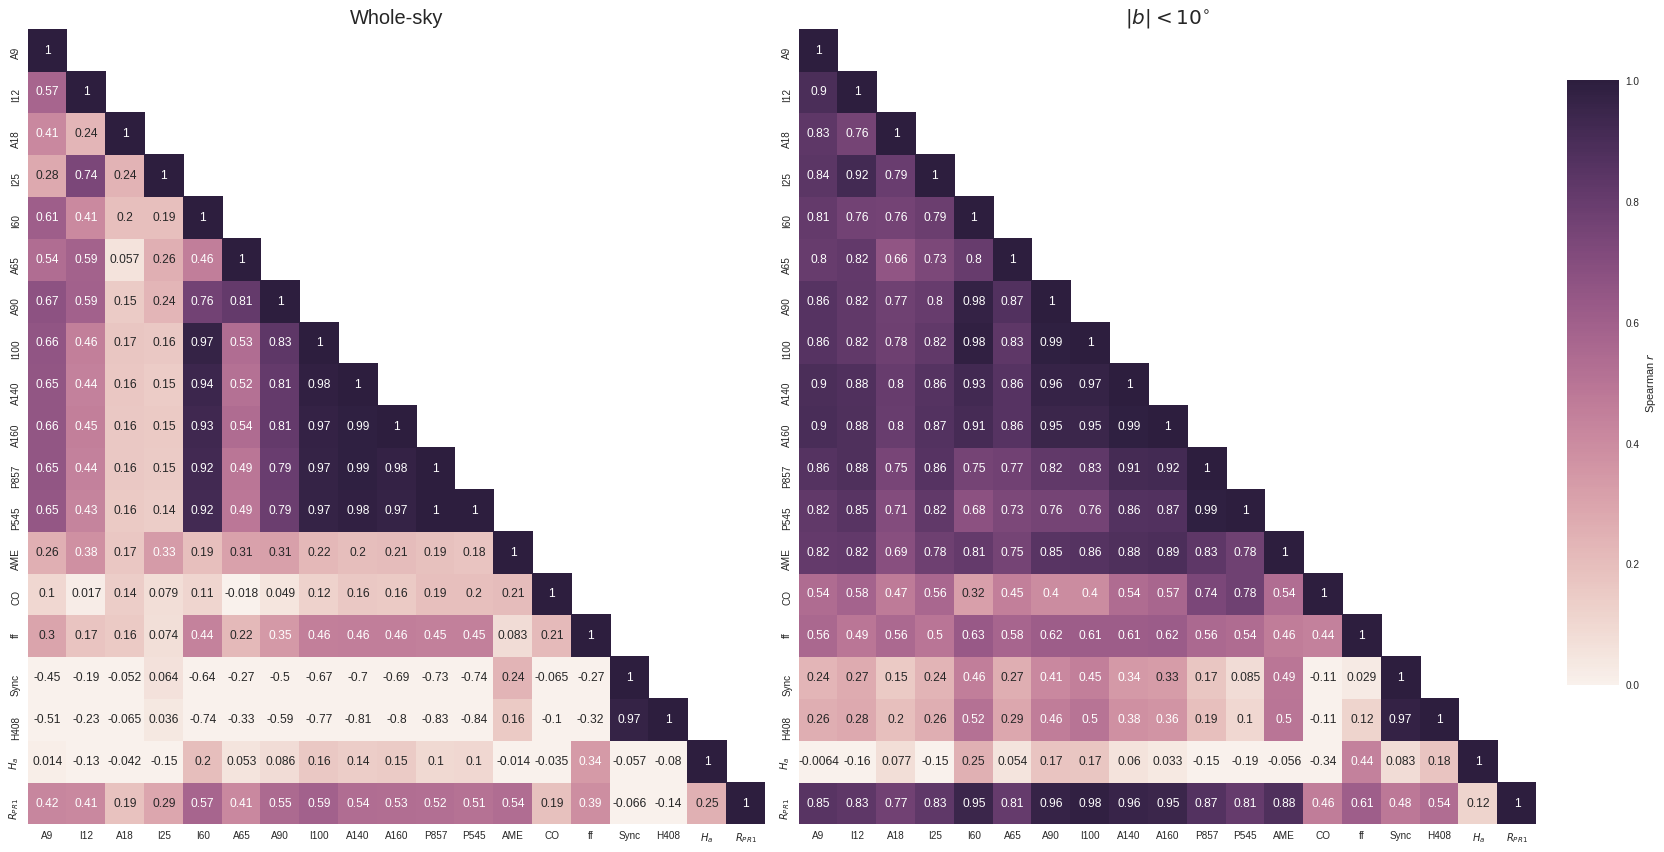

In [216]:
plotCorrMatrix(  
                ((phot_mpsub.join(planck_mw)).join(ancillframe[['H408','$H_{a}$']]).join(planck_bb['$R_{PR1}$']) ).divide(
                    ancillframe['$N_{H}$'], 
                    axis=0),
                pdf_suffix = 'R_norm'
               )

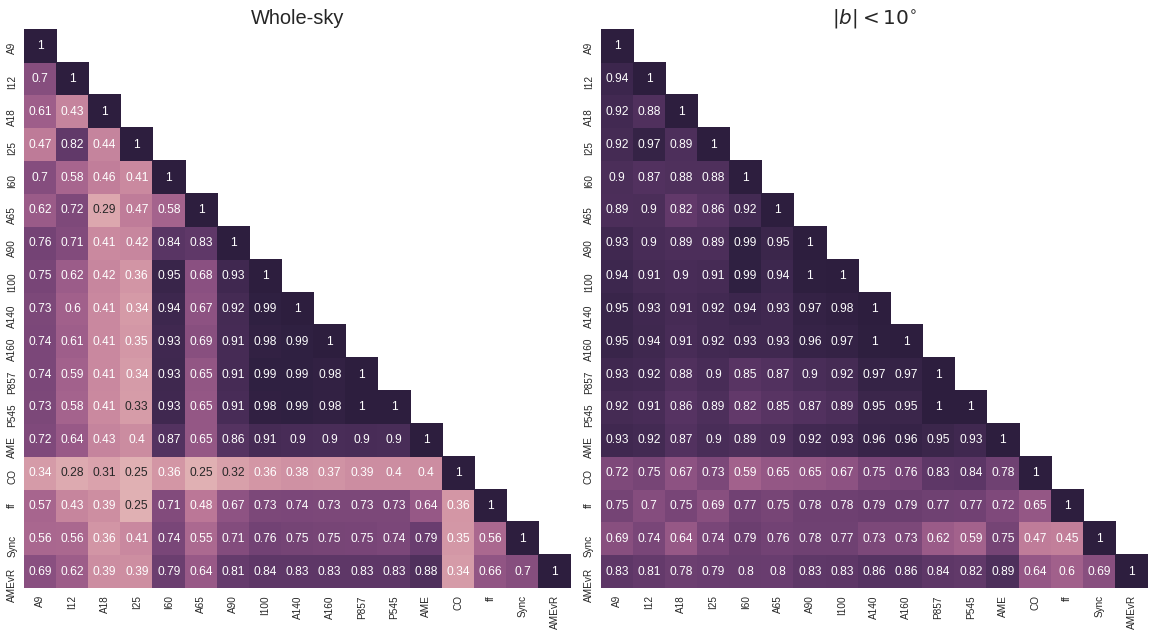

In [217]:
# Use AMEvar radiance as the AME metric:
planck_mw['AMEvR'] = AMEcomb_rad
plotCorrMatrix(  
                  phot_mpsub.join(planck_mw), 
                pdf_suffix = 'AMEvar_rad'
               )

# All-sky AME vs. IR plots:

In [13]:
def plotBandsCloud(xframe, yseries, xlabel, ylabel, xylims, outpath, nside=256):
    
    sb.set_style("whitegrid")

    ncols=4
    nrows=3
    aspect=1.0

    fig, axs = plt.subplots(ncols=ncols, 
                            nrows=nrows, 
                            sharey=True, 
                            sharex=True)
    #fig.subplots_adjust(hspace=0.1, left=0.1, right=0.7)
    plt.setp(axs.flat, aspect=1.0, adjustable='box-forced')

    k=0

    hsize = hp.nside2npix(nside)
    
    randsub = np.random.randint(low=0, high=hsize, size=hsize//50)


    for i in range(0,nrows):
        for j in range(0,ncols):
                
                #print k
                
                if k > 11:

                    pass

                else:

                    x = xframe[xframe.columns[k]].iloc[randsub]


                    y = yseries.iloc[randsub]

                    x_ = x[(x>0) & (y>0) & (np.isfinite(x)==True) & (np.isfinite(y)==True)].copy()
                    y_ = y[(x>0) & (y>0) & (np.isfinite(x)==True) & (np.isfinite(y)==True)].copy()

                    x_ = np.log10(x_).values
                    y_ = np.log10(y_).values

                    ax = axs[i,j]

                    sb.kdeplot(
                           x_,
                           y_,
                           shade=True,
                           shade_lowest=False,
                           gridsize=100,
                            ax = ax)



                    #ax.axis([xmin, xmax, ymin, ymax])
                    ax.axis(xylims)

                    ax.text(0.2, 0.9,xframe.columns[k], horizontalalignment='center',
                      verticalalignment='center',
                      transform=ax.transAxes, 
                      fontsize=15)

                    ax.grid(True)

                    ax.set_frame_on(True)

                    k += 1
                    
        ax = axs[-1,0]
        ax.set_ylabel(ylabel, fontsize=15)
        ax = axs[-1,0]
        ax.set_xlabel(xlabel, fontsize=15)

        plt.show()

        fig.savefig(outpath, bbox_inches='tight')
        fig.savefig(outpath[:-4]+".png", bbox_inches='tight')

                    
    return axs
    


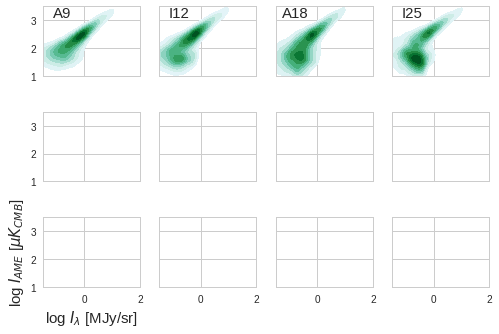

In [14]:
axs = plotBandsCloud(
                xframe = phot_mpsub, 
               yseries = planck_mw['AME'],
                ylabel = 'log $I_{AME}$ [$\mu{}K_{CMB}$]',
                xlabel = 'log $I_{\lambda}$ [MJy/sr]',
                xylims = [-1.5,2,1,3.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub_kde.pdf"
)

In [1]:
xframe = phot_mpsub.divide(planck_bb['$R_{PR1}$'], axis=0)
yseries = planck_mw['AME'].divide(planck_bb['$R_{PR1}$'], axis=0)
axs = plotBandsCloud(
                xframe = xframe, 
               yseries = yseries,
                ylabel = 'log $I_{AME}$ / $R$',
                xlabel = 'log $I_{\lambda}$ / $R$ ',
                xylims = [5,11,8,9],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub_Rnorm_kde.pdf"
)

NameError: name 'phot_mpsub' is not defined

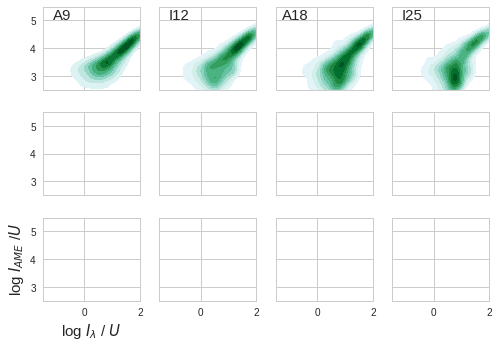

In [17]:
axs = plotBandsCloud(
                xframe = phot_mpsub.divide(planck_bb['$U$'], axis=0), 
               yseries = planck_mw['AME'].divide(planck_bb['$U$'], axis=0),
                ylabel = 'log $I_{AME}$ /$U$',
                xlabel = 'log $I_{\lambda}$ / $U$',
                xylims = [-1.5,2,2.5,5.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands_mpsub_UNorm_kde.pdf"
)

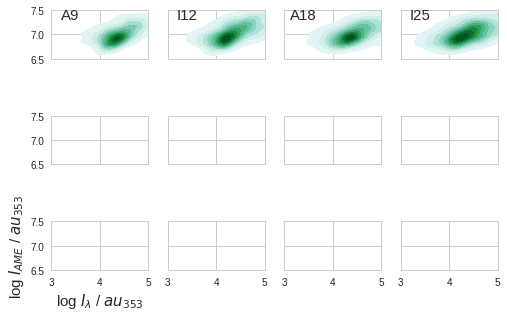

In [21]:
axs = plotBandsCloud(
                xframe = phot_mpsub.divide(planck_bb['$\tau_{353,PR1}$'], axis=0), 
               yseries = planck_mw['AME'].divide(planck_bb['$\tau_{353,PR1}$'], axis=0),
                ylabel = 'log $I_{AME}$ / $\tau{}_{353}$',
                xlabel = 'log $I_{\lambda}$ / $\tau{}_{353}$',
                xylims = [3,5,6.5,7.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub__tauNorm_kde.pdf"
)

# Check spatial correlations:

In [308]:
def testSpatialCorr(df, 
                    nside_in, 
                    nside_out,
                    method='spearman'):
    
    npix_in    = 12*nside_in**2
    npix_out   = 12*nside_out**2
    pix_interv = (nside_in/nside_out)**2
    
    ## First, do it the "normal way"-
    patches_corr = [df.iloc[i*pix_interv:(i+1)*pix_interv].corr(method=method) for i in range(0,npix_out)]
    corr_patches_pn = pd.Panel({i: patches_corr[i] for i in range(0,npix_out)})

    
    return corr_patches_pn

def displaySpatialCorr(corr_patches_pn,labels, ref_col=0,savefig=True,subdir='../Plots/Allsky_Corr/'):

    nside = len(corr_patches_pn.values[:,0,0])
    #fig = plt.figure(figsize=(8,4))

    for j in range(0,len(labels)):
        #plt.subplot(2,5,(j*2)+1)
        hp.mollview(corr_patches_pn.values[:,j,ref_col],
                         #sub=(1,4,j+1), 
                         #fig=fig,
                         cmap = cmap, 
                         cbar = False, 
                         min  = -1, 
                         max  = 1, 
                         nest = True, 
                         title="$S$({}:{}) NSIDE".format(labels[ref_col],labels[j],nside_out))
        hp.graticule(dpar=5, dmer=5,coord='G')
        if savefig==True:
            plt.savefig("{}/Spearman_Map_nside{}_{}to{}.pdf".format(subdir,nside_out,labels[ref_col],labels[j]) )

### Calculate all intensity correlations

In [315]:
%%capture
nside_in = 256
nside_out = 8
test_frame = phot_mpsub.join(planck_mw)
# Makes all the correlation maps

corr_patches_pn = testSpatialCorr(test_frame,
                                  nside_in, 
                                  nside_out)

for i in range(0,len(test_frame.columns)):
    displaySpatialCorr(corr_patches_pn, test_frame.columns, ref_col = i)

#### Get I12-normalized correlations

In [312]:
nside_in = 256
nside_out = 8
test_frame_I12norm = phot_mpsub.drop(['I12'],axis=1).join(planck_mw).divide(phot_mpsub['I12'], axis=0)
corr_patches_pn_I12norm = testSpatialCorr(test_frame_I12norm,
                                  nside_in, 
                                  nside_out)

##### Display just the A9:all correlations

In [313]:
%%capture
displaySpatialCorr(corr_patches_pn_I12norm, 
                   test_frame_I12norm.columns, 
                   ref_col = 0,
                   subdir='../Plots/Allsky_Corr/I12Norm',
                   savefig=False)

### Get the R-normalized correlations

In [ ]:
planck_mw.f

In [316]:
%%capture
nside_in = 256
nside_out = 8
test_frame_Rnorm = phot_mpsub.join(
    planck_mw['AME']).divide(
        planck_bb['$R_{PR1}$'], axis=0).join(planck_mw[['Sync','ff']])

corr_patches_pn_Rnorm = testSpatialCorr(test_frame_Rnorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
#### Display just the A9:all correlations

In [180]:
test_frame_Rnorm.columns

Index([u'A9', u'I12', u'A18', u'I25', u'I60', u'A65', u'A90', u'I100', u'A140',
       u'A160', u'P857', u'P545', u'AME', u'Sync', u'ff'],
      dtype='object')

In [317]:
%%capture
displaySpatialCorr(corr_patches_pn_Rnorm, 
                   test_frame_Rnorm.columns, 
                   ref_col = -3,
                   subdir='../Plots/Allsky_Corr/RNorm',
                   savefig=False)

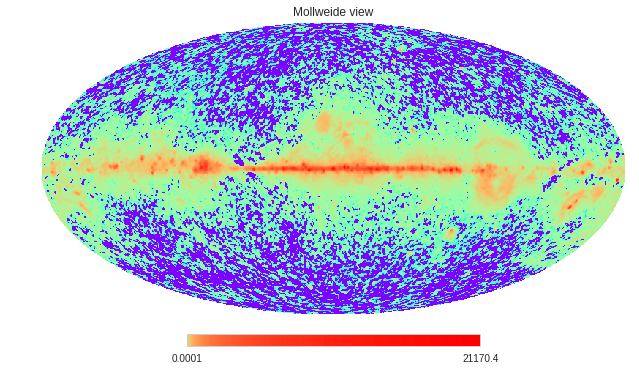

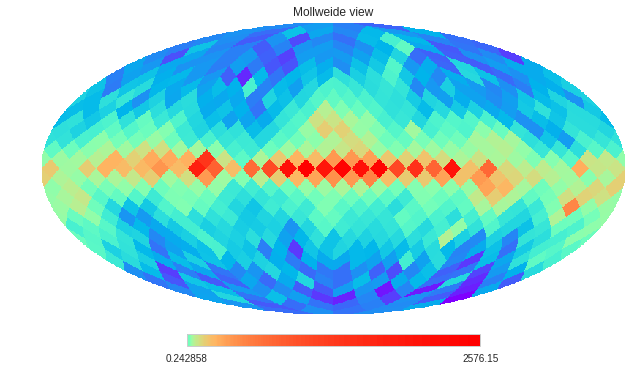

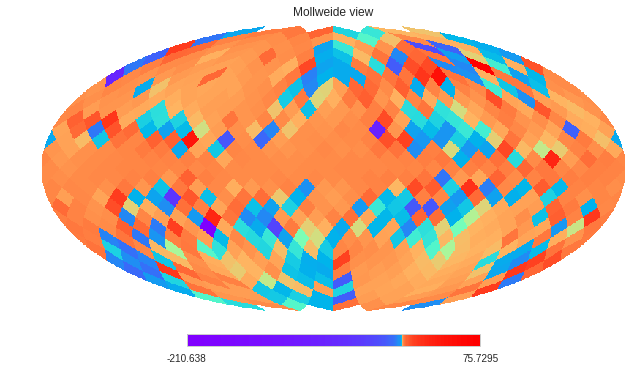

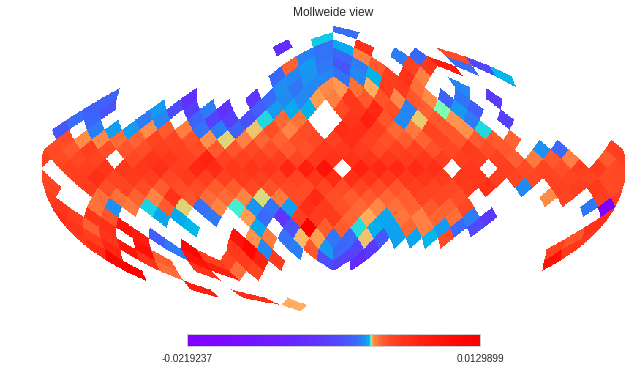

In [132]:
from matplotlib.colors import SymLogNorm

hp.mollview( planck_mw['ff'],
             nest=True,
             norm=SymLogNorm(linthresh=0.01,linscale=1,vmin=0), 
             cmap=cmap)

hp.mollview(
            hp.ud_grade(planck_mw['ff'],
                       nside_out=8,
                       order_in="NESTED",
                       order_out="NESTED"),
            norm=SymLogNorm(linthresh=0.01,
                                    linscale=1,vmin=0), 
            cmap=cmap,
            nest=True
)


# phot_I12norm = phot_mpsub.divide(
#                   phot_mpsub['I12'],
#                     axis=0)

# hp.mollview(phot_I12norm,
#             norm=SymLogNorm(linthresh=0.01,
#                                     linscale=1,vmin=0), 
#             cmap=cmap,
#             nest=True
# )


hp.mollview(hp.ud_grade(phot_mpsub['A9'].divide(
            phot_mpsub['I12'],axis=0),
                       nside_out=8,
                       order_in="NESTED",
                       order_out="NESTED"),
            norm=SymLogNorm(linthresh=0.01,
                                    linscale=1,vmin=0), 
            cmap=cmap,
            nest=True
)





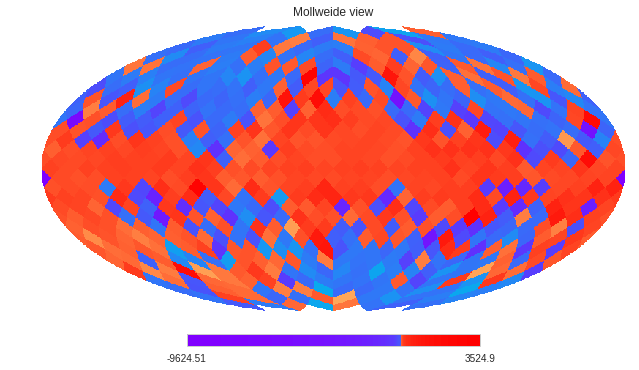

In [135]:
hp.mollview(hp.ud_grade(planck_mw['ff'].divide(phot_mpsub['A9']
            ,axis=0),
                       nside_out=8,
                       order_in="NESTED",
                       order_out="NESTED"),
            norm=SymLogNorm(linthresh=0.00001,
                                    linscale=1,vmin=0), 
            cmap=cmap,
            nest=True
)

## Compare R(9:12) to H-alpha  map:

In [18]:
#%matplotlib inline

import reproject as rp
import healpy as hp


import pandas as pd


import os

hframe = pd.DataFrame()

hframe['4.57e5'] = hp.ud_grade(
                               hp.read_map(
                                   '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits',
                                           nest=True),
                               nside_out = 256, 
                               order_in = 'NESTED', 
                               order_out = 'NESTED' )






NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


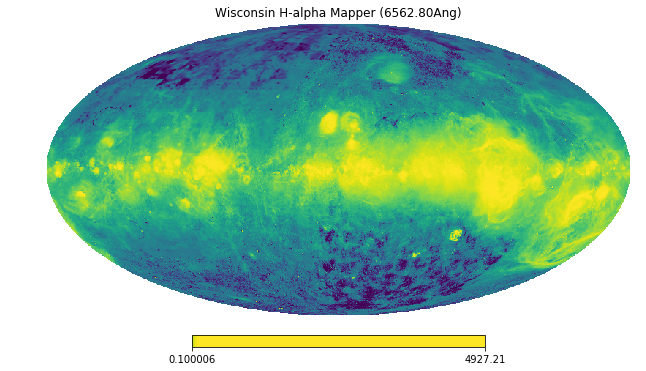

In [19]:
hp.mollview(
    hframe['4.57e5'],    
    norm = 'hist', 
    nest = True, 
    title = "Wisconsin H-alpha Mapper (6562.80Ang)")

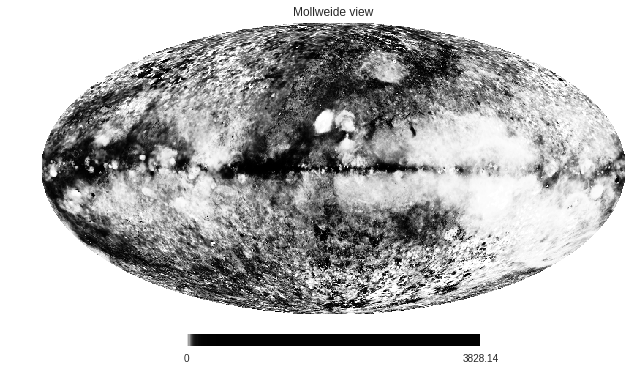

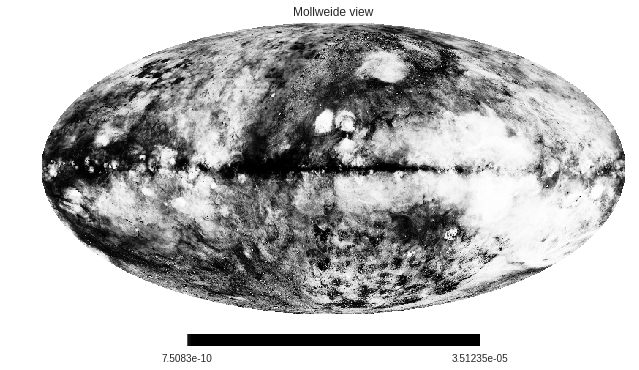

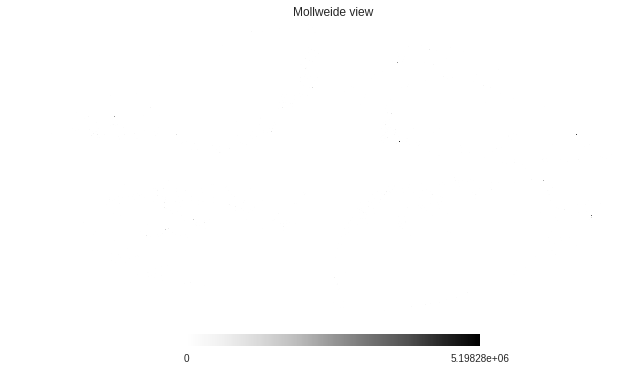

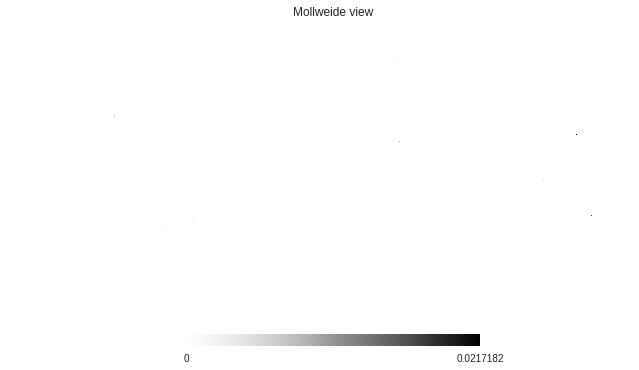

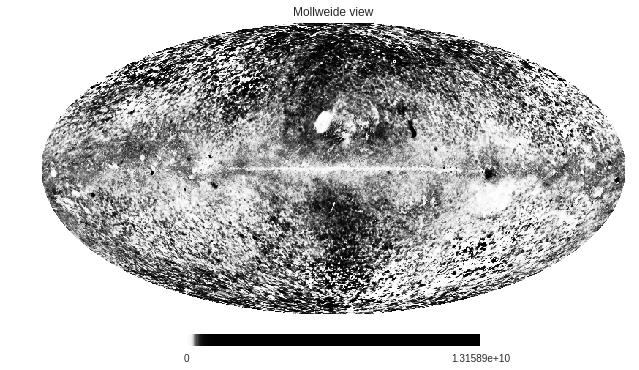

In [91]:
hp.mollview( planck_mw['AME']/hframe['4.57e5'], nest= True, norm = 'hist')

hp.mollview( planck_bb['$R_{PR1}$']/hframe['4.57e5'], nest= True, norm = 'hist'
)

hp.mollview(planck_mw['AME']/phot_mpsub['I12'], min=0,norm = 'symlog', nest=True)

hp.mollview(planck_bb['$R_{PR1}$']/phot_mpsub['I12'], min=0,norm = 'symlog', nest=True)

hp.mollview(planck_mw['AME']/planck_bb['$R_{PR1}$'], min=0, norm = 'hist', nest=True)


In [112]:

from scipy.stats import zscore
# def sigmaClip(df):

    
#     df.values[zscore(df.values, axis=1) < 1.5] = np.nan
    
#     return df
    


# print phot_mpsub_sclip

# def displayRatioMap(df1,df2):
    
#      hp.mollview(df1 / df2)
    

#displayRatioMap(phot_mpsub_sclip['A9'] , phot_mpsub_sclip['I25'])
    
#hp.mollview( phot_mpsub['A9'] / phot_mpsub['I25'], min=0.1, max = 5000, nest= True, norm = 'log',cmap=cmap)

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [121]:
phot_modesub

A9        I12         A18         I25         I60         A65  \
0       32.658911  37.119268  161.072815  142.307436  740.035726  838.570961   
1       16.294539  14.852996   15.603293   27.380762  123.152280   95.926353   
2       15.743084  12.737882   13.020123   20.860168   90.379049   89.560516   
3       12.935369   9.914995   11.142590   17.234209   70.307897   74.072433   
4       14.008063  10.866948   11.809466   18.152418   87.356573   91.148560   
5       12.316194   9.054711   10.017633   14.475979   68.252737   77.858353   
6       11.247262   8.551104    9.895395   14.768463   61.832174   69.443573   
7        9.665971   7.644593    8.649263   12.625923   53.692922   64.285782   
8       15.999671  13.278863   13.564499   21.664756  101.124403  103.032181   
9       12.792820  10.317648   10.756138   17.147487   81.752676   85.292099   
10      15.170090  13.149586   13.414742   21.805780  114.521352  113.906738   
11      17.144444  10.264977   11.554926   15.703708   76.605123   78.357613   
12      11.154841   8.446664    9.373318   13.780613   65.201047   71.450851   
13       8.863223   7.204871    7.827987   11.159822   52.551595   61.768524   
14      10.299716   8.639380    8.893457   13.134587   61.789903   67.257248   
15       8.275272   6.484120    7.287212    9.917760   49.519712   58.209438   
16      10.211407   7.336696    8.521225   11.647395   49.298948   62.526619   
17       8.417232   6.385571    7.345354    9.475332   35.585226   56.224235   
18      15.223437   7.103102   12.907763   10.646860   41.209802   56.247467   
19       6.965361   4.836678    6.122239    7.374139   30.443714   51.175869   
20       6.901379   4.947206    6.005427    6.987000   26.864061   48.733627   
21       5.520843   4.032001    5.273415    5.605792   25.387460   48.027126   
22       5.809491   4.225913    5.249277    5.869490   26.620748   46.011360   
23       5.342165   3.691269    4.863203    4.818989   24.686563   43.836670   
24       7.517575   6.151421    6.343897    8.578952   37.710748   53.138088   
25       6.571327   5.280955    5.523629    6.974636   28.514373   47.651344   
26       7.375443   5.637610    6.698905    7.640872   37.175184   49.936584   
27       6.417083   4.937815    6.240638    6.416816   26.028862   43.028606   
28       4.742126   3.755224    4.312227    5.055132   23.959806   41.367523   
29       5.408957   3.751894    5.163207    4.704955   24.212162   40.519043   
...           ...        ...         ...         ...         ...         ...   
786402  10.615454   7.156373    7.888969    8.655628   51.321012   60.711956   
786403  12.742759   9.517813    9.744725   11.047003   58.597364   66.698227   
786404   8.905887   6.727716    7.342884    7.960831   44.723024   55.138000   
786405   8.645476   5.642654    7.295964    7.539316   40.968893   50.668671   
786406  11.596201   8.270162    9.331158   10.452480   57.742578   66.898849   
786407   9.967158   7.003254    8.319696    9.624839   47.247365   59.691566   
786408  12.113146   8.865358    9.379919   11.496547   67.900350   73.864601   
786409  14.625805  10.631461   11.447127   13.539314   73.424551   80.002907   
786410  32.576643  15.157302   27.759785   17.765932   88.510488  102.259033   
786411  15.003907  11.130557   11.849095   15.103681   76.698400   93.410324   
786412  15.503018   9.369467   11.807606   12.583624   65.675115   72.080154   
786413  13.940537   8.955165   11.044425   12.526378   60.700655   71.005913   
786414  13.617366   9.410011   10.865038   14.401915   66.974134   81.798836   
786415  17.779768  13.429121   14.946829   19.195276   85.533590  103.840027   
786416   8.765138   6.294834    7.576973    8.430931   41.343381   51.412647   
786417  12.125371   9.418507   10.228035   11.682128   53.324140   65.600655   
786418  10.754650   7.589856    8.677954   10.414572   44.802892   58.102035   
786419  15.425465   9.380241   11.546221   12.901441   57.522508   70.261734   
786420  16.5618

In [125]:
pd.DataFrame(zscore(phot_modesub.replace(to_replace=np.nan, value=hp.UNSEEN, axis=0)), columns=phot.columns)

A9       I12       A18        I25        I60       A65  \
0       0.053086  8.982648  0.053086  11.496632  12.583464  0.013103   
1       0.053086  3.534650  0.053086   2.156356   2.027748  0.013103   
2       0.053086  3.017134  0.053086   1.626417   1.466953  0.013103   
3       0.053086  2.326444  0.053086   1.331729   1.123509  0.013103   
4       0.053086  2.559363  0.053086   1.406353   1.415235  0.013103   
5       0.053086  2.115954  0.053086   1.107563   1.088342  0.013103   
6       0.053086  1.992734  0.053086   1.131334   0.978478  0.013103   
7       0.053086  1.770934  0.053086   0.957206   0.839204  0.013103   
8       0.053086  3.149499  0.053086   1.691807   1.650821  0.013103   
9       0.053086  2.424964  0.053086   1.324681   1.319344  0.013103   
10      0.053086  3.117868  0.053086   1.703268   1.880061  0.013103   
11      0.053086  2.412076  0.053086   1.207343   1.231263  0.013103   
12      0.053086  1.967181  0.053086   1.051050   1.036124  0.013103   
13      0.053086  1.663345  0.053086   0.838054   0.819674  0.013103   
14      0.053086  2.014333  0.053086   0.998546   0.977754  0.013103   
15      0.053086  1.486995  0.053086   0.737109   0.767795  0.013103   
16      0.053086  1.695599  0.053086   0.877680   0.764017  0.013103   
17      0.053086  1.462883  0.053086   0.701152   0.529357  0.013103   
18      0.053086  1.638445  0.053086   0.796364   0.625601  0.013103   
19      0.053086  1.083907  0.053086   0.530385   0.441378  0.013103   
20      0.053086  1.110951  0.053086   0.498922   0.380126  0.013103   
21      0.053086  0.887023  0.053086   0.386669   0.354859  0.013103   
22      0.053086  0.934468  0.053086   0.408100   0.375962  0.013103   
23      0.053086  0.803654  0.053086   0.322724   0.342866  0.013103   
24      0.053086  1.405592  0.053086   0.628302   0.565727  0.013103   
25      0.053086  1.192611  0.053086   0.497917   0.408365  0.013103   
26      0.053086  1.279875  0.053086   0.552063   0.556563  0.013103   
27      0.053086  1.108653  0.053086   0.452582   0.365834  0.013103   
28      0.053086  0.819303  0.053086   0.341916   0.330430  0.013103   
29      0.053086  0.818488  0.053086   0.313456   0.334748  0.013103   
...          ...       ...       ...        ...        ...       ...   
786402  0.053086  1.651479  0.053086   0.634534   0.798617  0.013103   
786403  0.053086  2.229264  0.053086   0.828885   0.923126  0.013103   
786404  0.053086  1.546597  0.053086   0.578067   0.685717  0.013103   
786405  0.053086  1.281110  0.053086   0.543809   0.621478  0.013103   
786406  0.053086  1.923995  0.053086   0.780567   0.908499  0.013103   
786407  0.053086  1.614014  0.053086   0.713303   0.728912  0.013103   
786408  0.053086  2.069624  0.053086   0.865420   1.082312  0.013103   
786409  0.053086  2.501746  0.053086   1.031439   1.176839  0.013103   
786410  0.053086  3.609106  0.053086   1.374943   1.434980  0.013103   
786411  0.053086  2.623862  0.053086   1.158578   1.232859  0.013103   
786412  0.053086  2.192967  0.053086   0.953768   1.044236  0.013103   
786413  0.053086  2.091598  0.053086   0.949116   0.959116  0.013103   
786414  0.053086  2.202887  0.053086   1.101544   1.066464  0.013103   
786415  0.053086  3.186263  0.053086   1.491108   1.384041  0.013103   
786416  0.053086  1.440682  0.053086   0.616272   0.627886  0.013103   
786417  0.053086  2.204966  0.053086   0.880502   0.832894  0.013103   
786418  0.053086  1.757541  0.053086   0.777486   0.687083  0.013103   
786419  0.053086  2.195603  0.053086   0.979598   0.904733  0.013103   
786420  0.053086  2.987316  0.053086   1.212174   1.039977  0.013103   
786421  0.053086  2.746653  0.053086   1.250043   1.122741  0.013103   
786422  0.053086  3.497296  0.053086   1.256996   1.043686  0.013103   
786423  0.053086  3.270791  0.053086   1.527914   1.641787  0.013103   
786424  0.053086  2.483006  0.053086   1.120056   1.052687  0.013103   
786425  0.053086  2.871246  0.053086   1.308579   1.18

In [154]:

phot_modesub_zscore = pd.DataFrame(
    zscore(phot_modesub.replace(
        to_replace=np.nan, 
        value=hp.UNSEEN, 
        axis=0)), 
    columns=phot.columns)

phot_modesub_sclip = phot_modesub.copy()
phot_modesub_sclip[(abs(phot_modesub_zscore) > 5) & (phot_modesub_sclip < 0) ] = np.nan

In [206]:
hp.mollview(phot_modesub_sclip.A9 / phot_modesub_sclip.I12, min =0.01 , max = 1000, 
            nest=True, norm = 'log', cmap=cmap)

NameError: name 'phot_modesub_sclip' is not defined

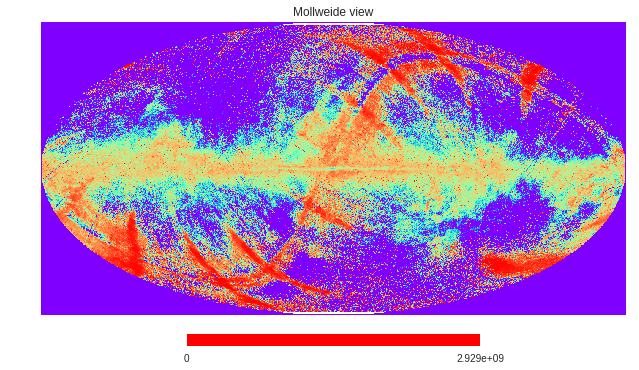

In [165]:
hp.mollview(phot_modesub_sclip.A9 / planck_bb['$R_{PR1}$'],  
            nest=True, norm = 'hist', min=0, cmap=cmap)

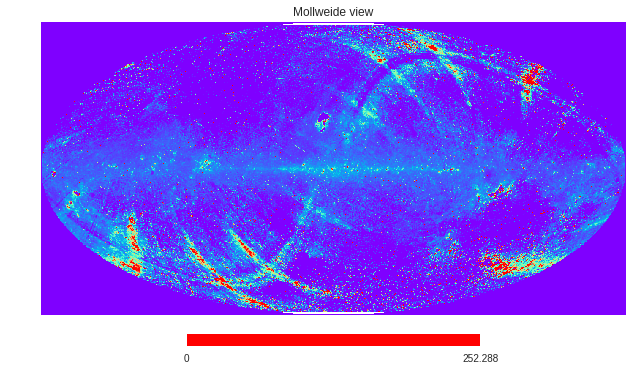

In [166]:
hp.mollview(phot_modesub_sclip.A9 / planck_mw['AME'],  
            nest=True, norm = 'hist', cmap=cmap, min=0)

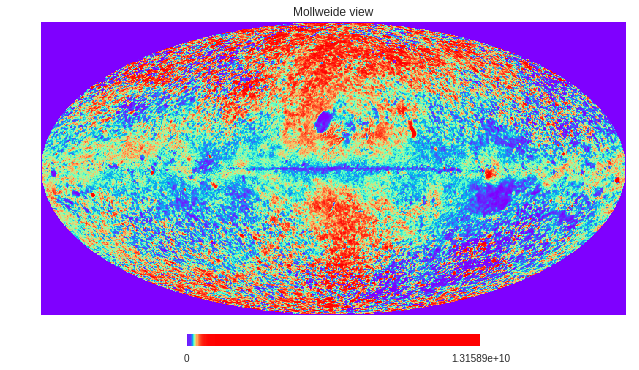

In [168]:
hp.mollview(planck_mw['AME'] / planck_bb['$R_{PR1}$'],  
            nest=True, norm = 'hist', cmap=cmap, min=0)

In [114]:
hp.mollview(phot_mpsub['A9'])

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

In [ ]:
hp.mollview( phot_mpsub['A9'].values[phot_mpsub['A9'].values>=0] / phot_mpsub['I25'].values[phot_mpsub['A9'].values>=0], nest= True, norm = 'hist')

In [ ]:
sb.joinplot(planck_mw['AME']/hframe['4.57e5'],
           phot_mpsub)

In [21]:
hframe['N(H1)'] = hp.ud_grade(
    hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits',
                                  nest=True),
    nside_out = 256,
    order_in = 'NESTED',
    order_out = 'NESTED',
    pess=True)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


In [ ]:
hp.mollview( planck_mw['AME']/radioframe['4.57e5'], nest= True, norm = 'hist'
)

In [ ]:
sb.jointplot

In [ ]:
nside_in = 256
nside_out = 8
test_frame_RadNorm = phot_mpsub.join(planck_mw['AME']).divide(planck_bb['$R_{PR1}$'], axis=0)
corr_patches_pn_RadNorm = testSpatialCorr(test_frame_RadNorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
for i in range(0,len(test_frame_RadNorm.columns)):
    displaySpatialCorr(corr_patches_pn_RadNorm, test_frame_RadNorm.columns, ref_col = i,
                                  subdir='../Plots/Allsky_Corr/UNorm')

In [ ]:
nside_in = 256
nside_out = 8
test_frame_UNorm = phot_mpsub.join(planck_mw['AME']).divide(planck_bb['$U$'], axis=0),
corr_patches_pn_UNorm = testSpatialCorr(test_frame_UNorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
for i in range(0,len(test_frame_UNorm.columns)):
    displaySpatialCorr(corr_patches_pn_UNorm, test_frame_UNorm.columns, ref_col = i,
                                  subdir='../Plots/Allsky_Corr/UNorm')

In [7]:
# All-sky Ionization fraction:
phot_mir_ratios = phot_mpsub.drop(['A9']).join(planck_bb['$R_{PR1}$']).join(planck_mw['$R_{PR1}$']).divide(phot_mpsub.A9)
   

NameError: name 'phot_mpsub' is not defined

In [ ]:
# The check appears successful, so make a plot grid of all the nsides:

## All-sky Noise Estimation:

In [ ]:
hmap_hists =  pd.DataFrame.hist(phot_modesub, 
                                range=(-10, 25), 
                                bins=100, 
                                alpha=0.4, 
                                grid=True,
                                sharex=True, 
                                xlabelsize=15,
                                sharey=False,
                                ylabelsize=12,
                                figsize=(11,8.5),
                                **{'normed':True})
hmap_hists

In [ ]:
def plot_hdists(df):
    
    import seaborn as sns
    import scipy.stats as stats
    sns.distplot(df, bins=1000, kde=False, fit=stats.gamma )
    print 
    
plot_hdists(phot_modesub[(phot_modesub>-5) & (phot_modesub<25)].A9.dropna())

In [ ]:
data = phot_modesub.dropna().values[:,0]
# phot_modesub[(phot_modesub>-5) & (phot_modesub<25)].A9.dropna()
# data.std()


In [ ]:
from astropy.modeling import models, fitting

def fitAndPlot(data, ymax=2.0, nbins=1000, amplitude =1, stddev = 1, mean=0, zero_mean=False, left_wing=False, left_mean=False, xrange=(-10,10)):
    

    # Get distribution
    y,x, patches = plt.hist(data, range=xrange, bins=nbins, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=amplitude, mean=mean, stddev=stddev)
    g_init.mean.fixed = zero_mean
    g_init.stddev.bounds = (0,None)
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.mean(data)], y[x[:-1]<np.mean(data)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black',alpha=0.8)



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,ymax)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text((xrange[1]-abs(xrange[0])*3)/8,ymax/4,"Stddev: "+str(round(g.stddev.value,3)),fontsize=22)
    plt.text((xrange[1]-abs(xrange[0])*3)/8,(ymax*5)/8,"Data mean: "+str(round(np.mean(data),3)),fontsize=22)
    
    return g.stddev.value

# fitAndPlot(data)
# plt.show()
# plt.close()
# fitAndPlot(data, zero_mean=True)
# plt.show()
# plt.close()
# fitAndPlot(data, zero_mean=False, left_wing=True)
# plt.show()
# plt.close()
fitAndPlot(data, left_mean=True)
plt.show()
plt.close()
    
# Select data

In [ ]:
# Get distribution
y,x, patches = plt.hist(planck_mw.AME.dropna().values-0, range =(-30,150),bins=1000, normed=True,alpha=0.8)
#print y
# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.1, mean=0, stddev=1.)
g_init.mean.fixed = False
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])

plt.plot(x,g(x),label='Gaussian', color='black')

plt.ylabel('Norm. Pixel Count', fontsize=22)
plt.xlabel('Intensity [uKCMB]',fontsize=22)
plt.legend(loc=2)


print np.size(planck_mw.AME.dropna()==0)

In [ ]:
# Get distribution
y,x, patches = plt.hist(planck_bb['$T$'].dropna().values, range =(0,50),bins=100, normed=True,alpha=0.8)
#print y
# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.1, mean=20, stddev=1.)
g_init.mean.fixed = False
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x[:-1], y)

plt.plot(x,g(x),label='Gaussian', color='black')



# Plot the data with the best-fit model
# plt.figure(figsize=(8,5))
# plt.plot(x, y[:-1], 'ko')
# plt.plot(x, g(x), label='Gaussian')
#plt.ylim(0,2.0)
plt.ylabel('Norm. Pixel Count', fontsize=22)
plt.xlabel('Intensity [uKCMB]',fontsize=22)
plt.legend(loc=2)
#plt.text(60,0.008,"Stddev: "+str(round(g.stddev.value,3)),fontsize=22)
#plt.text(60,0.006,"Data mean: "+str(round(np.mean(data),3)),fontsize=22)

#print np.size(planck_mw.T.dropna()==0)

In [ ]:
## Whole sky without mean-fixing or wing-selection

In [ ]:
stddevs = []
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub.dropna().values[:,i]
    stddev = fitAndPlot(data)
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+".pdf", bbox_inches='tight', dpi=100)
    plt.show()
 

In [ ]:
## Whole sky with mean fixed to zero, using only the left wing

In [ ]:
stddevs = []

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub.dropna().values[:,i]
    stddev = fitAndPlot(data, zero_mean=True, left_wing=True)
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

## Noise estimated for limited patches:

#### Patch 1: (l:130, b:60) [25x25 degree Gal] , npix = 20164

In [ ]:
stddevs = []

noise_patches = [(coords.glon > 117.5) & (coords.glon < 142.5) & (coords.glat > 47.5) & (coords.glat < 72.5),
                 (coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat < -47.5) & (coords.glat > -72.5),
                 (coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat > 47.5) & (coords.glat < 72.5)]

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[0]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False,
                        left_mean=False,                        
                        nbins=400, 
                        xrange=(-4,4))
    
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_noisePatch1.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

#### Patch 2: (l:230, b:-60) [25x25 degree Gal] , npix = 20164

In [ ]:
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[1]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False, 
                        nbins=1000, 
                        xrange=(data.min(),data.max()))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatch2.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

#### Patch 3: (l:230, b:60) [25x25 degree Gal] , npix = 20164

In [ ]:
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[2]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False, 
                        nbins=1000, 
                        xrange=(data.min(),data.max()))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatch3.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

In [ ]:
#### All 3 patches merged together:

noise_patches_merged = ((coords.glon > 117.5) & (coords.glon < 142.5) & (coords.glat > 47.5) & (coords.glat < 72.5)) | \
                 ((coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat < -47.5) & (coords.glat > -72.5)) | \
                 ((coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat > 47.5) & (coords.glat < 72.5) )


for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches_merged].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(np.random.choice(data, size=len(noise_patches_merged)//1),
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_mean=False,                        
                        nbins=1000, 
                        xrange=(data.min(),5))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatchMerged.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

## Estimate noise for a limited part of the sky: Planck CMB Mask

#### Masking test

In [ ]:
data =  phot_modesub.A9.values.copy
hp.mollview(data)
print len(data[np.isnan(data)==True])
hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')
data[hmask==hp.UNSEEN] = np.nan
print len(data[np.isnan(data)==True])
print len(hmask[hmask==hp.UNSEEN])

In [ ]:
from astropy.modeling import models, fitting

def fitAndPlotMaskedTest(data,zero_mean=False, left_wing=False, left_mean=False):
    
    hp.mollview(data.values)
    plt.show()
    plt.close()
    
    data_unmask = data.copy()
    data_mask   = data.copy()
    
    data_unmask = data_unmask.dropna().values

    # Get distribution

    y,x, patches = plt.hist(data_unmask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_unmask)], y[x[:-1]<np.median(data_unmask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_unmask),5)),fontsize=22)
    plt.show()
    plt.close()
    
    # Mask pixels from the degraded Planck Foreground Mask Map:
    hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')


    data_mask[hmask==hp.UNSEEN] = np.nan
    hp.mollview(data_mask)
    plt.show()
    plt.close()
    
    y,x, patches = plt.hist(data_mask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_mask)], y[x[:-1]<np.median(data_mask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_mask),5)),fontsize=22)
        
    
    
    
    
    return g.stddev.value

  
fitAndPlotMaskedTest(phot_modesub.A9.copy(), zero_mean=True, left_wing=True)
plt.show()
plt.close()

    
# Select data

In [ ]:
from astropy.modeling import models, fitting

def fitAndPlotMasked(data,zero_mean=False, left_wing=False, left_mean=False):
    

    data_mask   = data.copy()
    
    # Mask pixels from the degraded Planck Foreground Mask Map:
    hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')


    data_mask[hmask==hp.UNSEEN] = np.nan

    y,x, patches = plt.hist(data_mask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_mask)], y[x[:-1]<np.median(data_mask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_mask),5)),fontsize=22)
        
    
    
    
    
    return g.stddev.value


stddevs = []

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[phot_modesub.columns[i]].copy()
    stddev = fitAndPlotMasked(data, zero_mean=True, left_wing=True)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_masked.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
    
# Select data

## Offset Uncorrected Maps:

In [ ]:
stddevs = []

for i in range(0,len(phot.columns)):
    data = phot.dropna().values[:,i]
    stddev = fitAndPlot(data, zero_mean=False, left_wing=False, left_mean=True)
    stddevs.append(stddev)
    plt.title(phot.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot.columns[i]+"_nonOffsetCorr_leftWing_zeroMean.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


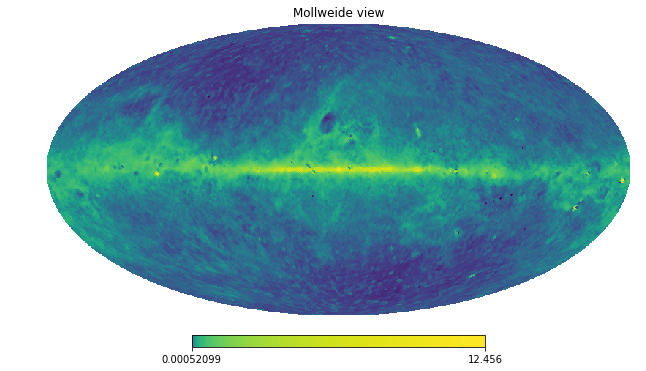

In [43]:
wmap_spd = hp.read_map(
    '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/wmap_mcmc_sd_k_spin_dust_temp_7yr_v4p1.fits',
    nest=True)
wmap_spd[wmap_spd==hp.UNSEEN] = np.nan

hp.mollview(wmap_spd, 
            nest=True,
           norm ='log')

In [44]:
wmap_planck_spdust = hp.ud_grade(planck_mw['AME'],
                                 nside_out=64,
                                 order_in = 'NESTED',
                                 order_out = 'NESTED') / wmap_spd

#sb.joinplot()

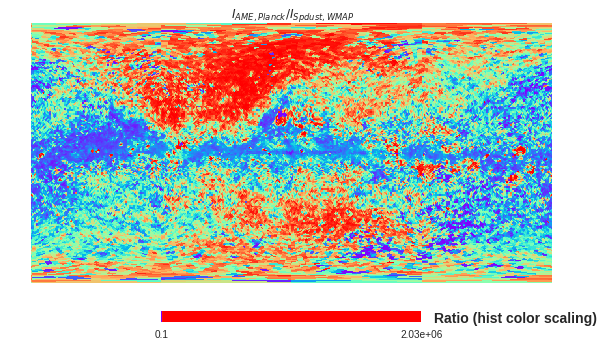

In [234]:
hp.cartview(wmap_planck_spdust, 
            norm='hist',
            min=0.1,
            nest=True,
            title = " $I_{AME, Planck} / I_{Spdust, WMAP}$",
            unit="Ratio (hist color scaling)",
            cmap =cmap)

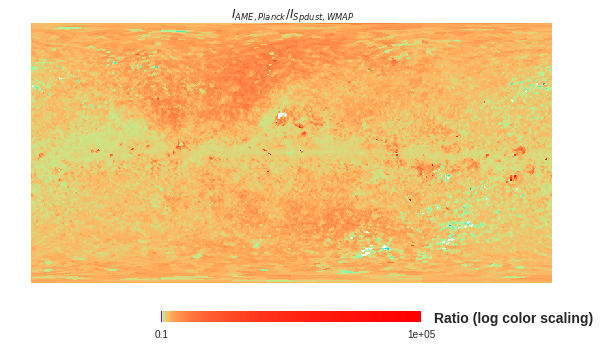

In [243]:
hp.cartview(wmap_planck_spdust, 
            norm='log',
            min=0.1,
            max = 1e5,
            nest=True,
            title = " $I_{AME, Planck} / I_{Spdust, WMAP}$",
            unit="Ratio (log color scaling)",
            cmap =cmap)

In [245]:
planck_spd_n64 = hp.ud_grade(planck_mw['AME'],
                                 nside_out=64,
                                 order_in = 'NESTED',
                                 order_out = 'NESTED')


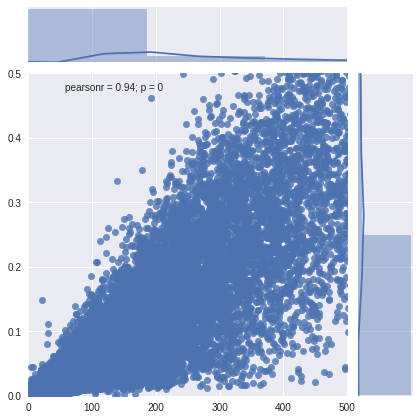

In [230]:
import seaborn as sb


sb.jointplot(   
            planck_spd_n64,
            wmap_spd,
            kind = 'reg',
            dropna =True,
            xlim = (0,500),
            ylim = (0,0.5)
            )

In [ ]:
sb.jointplot(   
            A9_n64[(A9_n64!=hp.UNSEEN) & (wmap_spd!=hp.UNSEEN)],
            wmap_spd[(A9_n64!=hp.UNSEEN) & (wmap_spd!=hp.UNSEEN)],
            kind = 'reg',
            dropna =True,
            xlim = (-1,10),
            ylim = (-0.1,2)
            )

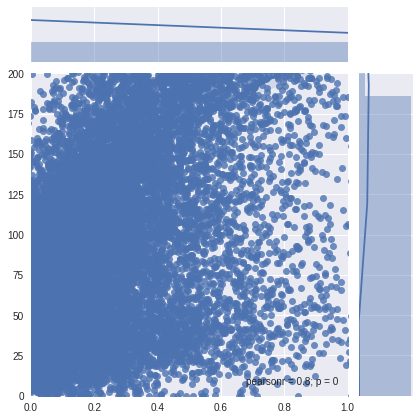

In [250]:
sb.jointplot(   
            A9_n64[(A9_n64!=hp.UNSEEN) & (planck_spd_n64!=hp.UNSEEN)],
            planck_spd_n64[(A9_n64!=hp.UNSEEN) & (planck_spd_n64!=hp.UNSEEN)],
            kind = 'reg',
            dropna =True,
            xlim = (0,1),
            ylim = (-0.1,200)
            )

In [269]:
import aplpy
   

def fits_display(image_file):
    
 
    # Create a new figure
    fig = aplpy.FITSFigure(image_file)

    # Show the colorscale
    #fig.show_colorscale()

    # Make ticks white
#     fig.ticks.set_color('white')

#     # Make labels smaller
#     fig.tick_labels.set_font(size=15)
    
#     # Round out those tick labels:
#     fig.tick_labels.set_xformat('ddd.dd')
#     fig.tick_labels.set_yformat('ddd.dd')
    
#     # Overlay a grid
#     fig.add_grid()
#     fig.grid.set_alpha(0.5)
    
#     # Add a colorbar
#     fig.add_colorbar()
#     fig.colorbar.set_axis_label_text('Intensity (MJy/sr)')
    
    return fig


In [272]:
## This will make a single cutout:

from drizzlib.healpix2wcs import healpix2wcs

def make_fits_cutout(hdr_temp, hp_path, out_path):
    

    
    healpix2wcs( 
            hp_path, 
            #field=0, 
            header=hdr_temp, 
            header_hdu=None, 
            output=out_path, 
            use_bilinear_interpolation=False, 
            ignore_blank=True, 
            blank_value=hp.UNSEEN, 
            clobber=True)
    
    aplpy.FITSFigure(out_path)
    
    
    
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_halpha.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)


Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
3145728 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
14438 HEALPixels in the WCS wrapper polygon.




AttributeError: 'XAxis' object has no attribute 'get_axes'

AttributeError: 'XAxis' object has no attribute 'get_axes'